## Formulando algumas perguntas simples
- Maiores unicórnios por país 
- Cidades dominantes na produção de unicórnios
- Qual indústria produz mais unicórnios 
- Faixa de avaliação de empresas Unicorn 
- Ano sábio padrão de empresas sendo unicórnio

Idéias que não pensei...
- 1) Convertendo colunas de investidores em várias colunas com o nome do investidor -
- 2) Agrupe pelos dados por ano e depois faça a análise - 
- 3) Selecione dataframes apenas para os principais países para obter granularidade - 
- 4) Análise do ano atual - 

In [1]:
# Importar as libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Startups+in+2021+end.csv')

In [3]:
df.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [4]:
df.isnull().sum()

Unnamed: 0           0
Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                15
Industry             0
Select Investors     1
dtype: int64

- Renomeando colunas para melhor consulta

In [5]:
df.rename( columns={
    'Unnamed: 0' : 'Id',
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor ($)',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'Pais',
    'City' : 'Cidade',
    'Industry': 'Setor',
    'Select Investors': 'Investidores',
}, inplace=True )

# Ajustes de Variáveis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor ($)       936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   Pais            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


- Nota-se que a coluna 2  está no tipo string, vou converter para numérico, tornando a análise mais precisa
'Valor ($) 936 non-null object' 

In [7]:
df['Valuation ($B)'] = df['Valor ($)'].str.replace(r'$','',regex=True).astype(float)

In [8]:
df['Valor ($)'] = pd.to_numeric( df['Valor ($)'].apply( lambda Linha: Linha.replace('$', '') ) )

df.head()

,Id,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores,Valuation ($B)
0,0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",140.0
1,1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",100.3
2,2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",95.0
3,3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",45.6
4,4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",40.0


In [9]:
# Conversão para Data
df['Data de Adesão'] = pd.to_datetime( df['Data de Adesão'] )

In [10]:
# Extrair o Ano e Mes
df['Mes'] = pd.DatetimeIndex( df['Data de Adesão'] ).month
df['Ano'] = pd.DatetimeIndex( df['Data de Adesão'] ).year

df.head()

,Id,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores,Valuation ($B),Mes,Ano
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",140.0,4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",100.3,12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",95.0,1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",45.6,12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",40.0,1,2018


In [11]:
Analise_Agrupada = df.groupby( by=['Pais', 'Ano', 'Mes', 'Empresa'] ).count()['Id'].reset_index()

Analise_Agrupada

,Pais,Ano,Mes,Empresa,Id
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1
933,United States,2021,12,YipitData,1
934,"United States,",2021,9,TrialSpark,1


# Análise Exploratoria

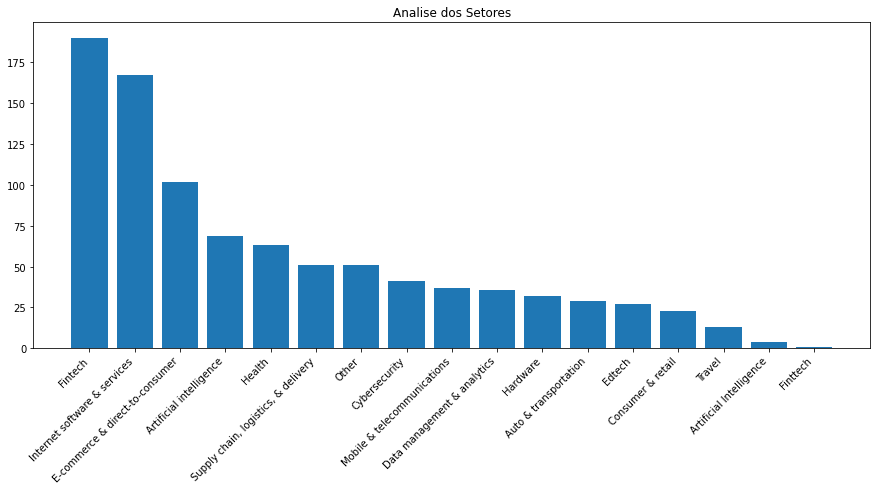

In [12]:
plt.figure( figsize=(15,6) )
plt.title('Analise dos Setores')
plt.bar( df['Setor'].value_counts().index, df['Setor'].value_counts()  )
plt.xticks( rotation=45, ha='right' );

<AxesSubplot:title={'center':'Top 10 Países Geradores de uNICÓRNIOS'}, xlabel='Pais', ylabel='count'>

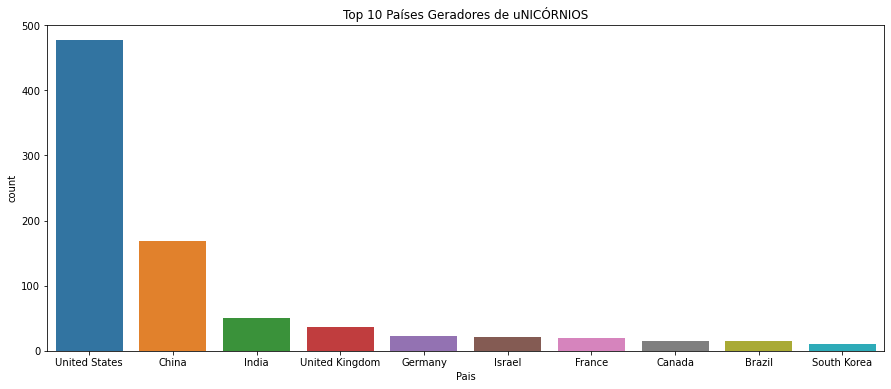

In [20]:
plt.figure( figsize=(15,6) )
plt.title('Top 10 Países Geradores de uNICÓRNIOS')
sns.countplot(x = df['Pais'], order = df['Pais'].value_counts().nlargest(10).index)

<AxesSubplot:title={'center':'Top 10 Países Geradores de uNICÓRNIOS'}, xlabel='Cidade', ylabel='count'>

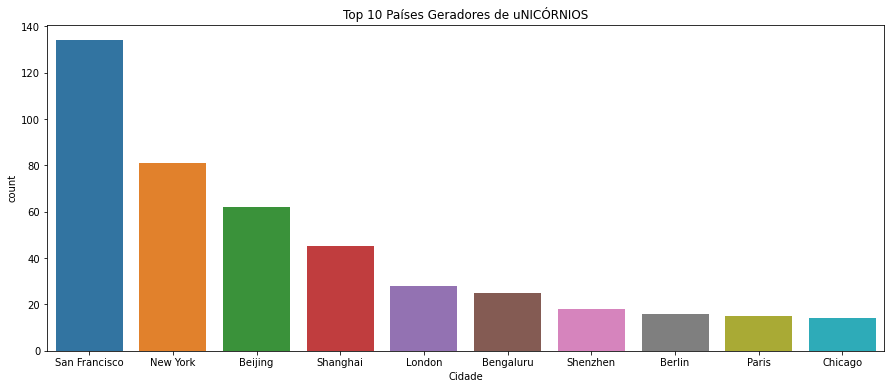

In [21]:
plt.figure( figsize=(15,6) )
plt.title('Top 10 Países Geradores de uNICÓRNIOS')
sns.countplot(x = df['Cidade'], order = df['Cidade'].value_counts().nlargest(10).index)

<AxesSubplot:xlabel='Empresa'>

<Figure size 1080x576 with 0 Axes>

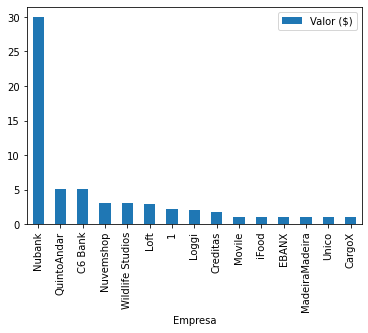

In [60]:
brasil = df[df['Pais'] == 'Brazil']
plt.figure(figsize=(15,8))
brasil.plot('Empresa', 'Valor ($)', kind='bar')


### Análise Principais Países

In [75]:
analise_pais = df(by=['Pais']).sum()['Valor($)'].reset_index()
analise_pais.head()

TypeError: 'DataFrame' object is not callable

### Separando Mês e Ano para análises mais detalhadas.

In [14]:
analise_agrupada = df.groupby( by=['Pais', 'Ano', 'Mes', 'Empresa'] ).count()['Id'].reset_index()

analise_agrupadaAnalise_agrupada = df.groupby( by=['Pais', 'Ano', 'Mes', 'Empresa'] ).count()['Id'].reset_index()

analise_agrupada

,Pais,Ano,Mes,Empresa,Id
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1
933,United States,2021,12,YipitData,1
934,"United States,",2021,9,TrialSpark,1


In [15]:
analise_agrupada.loc[
    analise_agrupada
]
analise_agrupada

,Pais,Ano,Mes,Empresa,Id
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1
933,United States,2021,12,YipitData,1
934,"United States,",2021,9,TrialSpark,1


<AxesSubplot:xlabel='Empresa'>

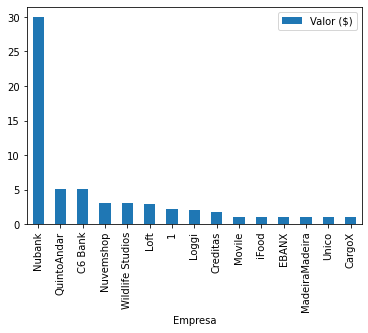